In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, and_, distinct

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database
last_date_db = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
pd.to_datetime(last_date_db)
end_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
start_date = dt.date(2016, 8, 23) - dt.timedelta(days=365)

end_date

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
                    filter(and_(Measurement.date <= end_date,\
                                Measurement.date >= start_date)).all()
prcp_data


# Save the query results as a Pandas DataFrame and set the index to the date column
df_prcp = pd.DataFrame(prcp_data, columns=['date','precipitation'])
df_prcp.dropna()


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data



,date,precipitation
0,2015-08-24,0.42
1,2015-08-25,0.20
2,2015-08-26,0.62
3,2015-08-27,0.62
4,2015-08-28,0.06
5,2015-08-29,0.00
6,2015-08-30,0.00
7,2015-08-31,0.00
8,2015-09-01,0.00
9,2015-09-02,0.00


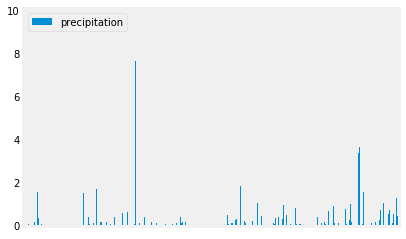

In [12]:
df_prcp.plot.bar()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.grid()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prcp.describe()

,precipitation
count,2076.000000
mean,0.233950
std,0.587447
min,0.000000
25%,0.000000
50%,0.030000
75%,0.200000
max,9.640000


In [14]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(distinct(Measurement.station))).all()

[(9)]

In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
data_station = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()
df_station = pd.DataFrame(data_station, columns=['station_name', 'count_of_measurements'])
df_station

,station_name,count_of_measurements
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
low_temp = session.query(func.min(Measurement.tobs)).\
                   filter(Measurement.station == 'USC00519281').all()
hi_temp = session.query(func.max(Measurement.tobs)).\
                  filter(Measurement.station=='USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).\
                   filter(Measurement.station=='USC00519281').all()
temp = [low_temp, hi_temp, avg_temp]
temp

[[(54.0)], [(85.0)], [(71.66378066378067)]]

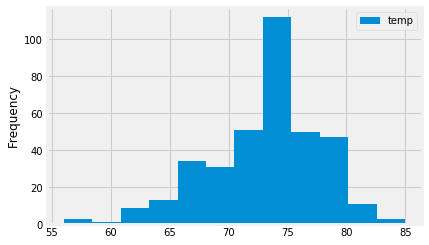

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist_t = session.query(Measurement.tobs).\
                filter(Measurement.station == 'USC00519281').\
                filter(and_(Measurement.date <= end_date,\
                            Measurement.date >= start_date)).all()
df_hist_t = pd.DataFrame(hist_t, columns=['temp'])
df_hist_t.plot.hist(bins=12)

In [18]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [40]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps_list = calc_temps('2016-08-24', '2017-08-23')
calc_temps_tuple = calc_temps_list[0]
y_axis = list(calc_temps_tuple)
 

[58.0, 74.57894736842105, 87.0]

Text(0.5, 1.0, 'Trip Avg Temp')

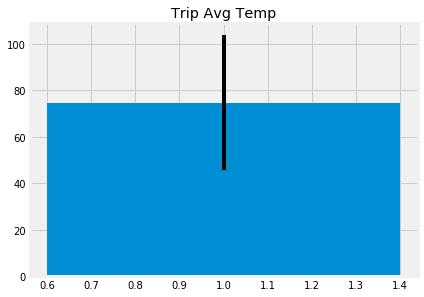

In [45]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
t_avg = y_axis[1]
x_axis = 1
y_err = y_axis[2] - y_axis[0]
plt.bar(x_axis, t_avg, yerr=y_err)
plt.tight_layout()
plt.title('Trip Avg Temp')

In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
